**EVALUACIÓN** DE MODELOS: ROC Curve using Python Sklearn

1- Import Necessary Packages

In [11]:
import pandas as pd      
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

2- Fit the Logistic Regression Model

In [ ]:
#import dataset from CSV file on Github

#The dataset consists of 10000 individuals and whether their credit card has defaulted or not. The main aim is to build the model using Logistic Regression and predict the accuracy of it .
#Attributes:
#Default : Yes or No (Whether defaulted or Not).
#Student : Yes or Nor (Whether Student or not).
#Balance : Total Balance for given credit card holder.
#Income : Gross Annual Income of credit card holder.

url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/default.csv"
df = pd.read_csv(url)
df.head()

In [13]:
#define the predictor variables and the response variable
X = df[['student', 'balance', 'income']]
y = df['default']

In [14]:
#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

In [15]:
#instantiate the model and fit the models using the training data
log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)
knn= KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

3-  Plot the ROC Curve

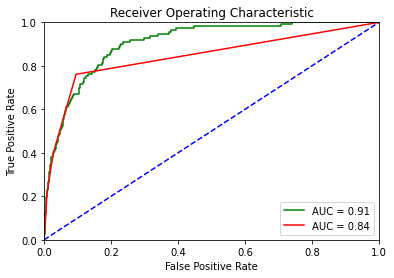

In [16]:
#define metrics
y_log_reg_pred_proba = log_regression.predict_proba(X_test)[::,1] # modelo 1 predicciones
y_knn_pred_proba = knn.predict_proba(X_test)[::,1]                # modelo 2 predicciones

fpr_log_reg, tpr_log_reg, _ = metrics.roc_curve(y_test, y_log_reg_pred_proba)
roc_auc_log_reg = metrics.auc(fpr_log_reg, tpr_log_reg)

fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  y_knn_pred_proba)
roc_auc_knn = metrics.auc(fpr_knn, tpr_knn)

#create ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_log_reg,tpr_log_reg, 'g', label='AUC = %0.2f' % roc_auc_log_reg)
plt.plot(fpr_knn,tpr_knn, 'r', label='AUC = %0.2f' % roc_auc_knn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
#AUC
print("AUC del modelo LogisticRegression", metrics.roc_auc_score(y_test,  y_log_reg_pred_proba)) 
print("AUC del modelo KNeighborsClassifier", metrics.roc_auc_score(y_test,  y_knn_pred_proba)) 

AUC del modelo LogisticRegression 0.9050028967204219
AUC del modelo KNeighborsClassifier 0.8424827806063802
